In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/NLP_internship/T20_Worldcup_tweets.xlsx'
data = pd.read_excel(file_path, na_filter=False, names=['user_name', 'user_location', 'user_description', 'user_created', 'user_followers',
                                                        'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet'])
data = data[['user_name', 'user_location', 'user_description', 'user_created', 'user_followers',
            'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet']]
data.head(10)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Prabhudatta Nayak🇮🇳,"Balangir, India",Proud to be an Indian ll #contestlover ll #bor...,21/05/10 11:05,134,532,6625,0,22/10/21 23:55,@ManappuramMAFIL Done Team \n@ManappuramMAFIL ...,"['GuessAndWin', 'T20WorldCup', 'Contest', 'Cri...",Twitter for Android,0
1,Archisman Mishra,"Bhubaneshwar, India","RISING FROM THE ASHES ENGINEER,GAMER,FOODY,POK...",10/12/15 18:43,656,762,5286,0,22/10/21 23:55,Set a reminder for my upcoming Space! https://...,"['T20WorldCup', 'AUSvSA']",Twitter for Android,0
2,T20 World Cup,,Official account of the ICC T20 World Cup. Men...,19/04/18 12:46,378202,1097,296,1,22/10/21 23:55,"""We just try to enjoy everything that we do.""\...","['WestIndies', 'T20WorldCup']",Khoros Publishing App,0
3,Farid Khan,"Lahore, Pakistan",Journalist. Head of Digital Media @_cricingif ...,25/07/21 3:59,1125,424,56,0,22/10/21 23:54,#Pakistan and #India played each other in open...,"['Pakistan', 'India', 'IND', 'T20WorldCup', 'NZ']",Twitter Web App,0
4,Bimal Mirwani,Hong Kong,I write all about Pakistan cricket on my site ...,01/03/14 20:41,742,1433,811,0,22/10/21 23:49,#Pakistan won't be much of a challenge for #In...,"['Pakistan', 'India', 'Agarkar', 'AjitAgarkar'...",Twitter Web App,0
5,Ilham Khan,Afghanistan,Afghan Nationalist,18/07/21 3:26,290,268,2859,0,22/10/21 23:47,This is exactly what India is going to do to P...,"['IndvsPak', 'INDvPAK', 'T20WorldCup']",Twitter Web App,0
6,AM338✌,Dubai United Arab Emirates🇦🇪,Pharmacist ⚕\nBig Fan of 'Shahrukh Khan.\n\npr...,05/05/14 4:17,1516,1656,10103,0,22/10/21 23:45,Am i the only one who waiting for Sunday!!!\n#...,"['INDvPAK', 'T20WorldCup']",Twitter for Android,0
7,Naveed Khan,"Silicon Valley, California","Business Development Expert, Technology and Fi...",08/10/13 4:28,305,132,4527,0,22/10/21 23:43,@ESPNcricinfo @FirdoseM It would be even more ...,['T20WorldCup'],Twitter Web App,0
8,TheBharatBoy,,Proud Indian🇮🇳 Cricket Lover🏏,22/10/21 20:14,2,77,2,0,22/10/21 23:43,@SportzFirst @MontyPanesar Having MSD as a men...,"['T20WorldCup', 'MSDhoni']",Twitter for iPhone,0
9,cryptosux,Internet,Whitehat hacker/pentester/cyberthreat research...,29/06/21 17:58,47,92,2003,0,22/10/21 23:43,The #SaitamaWolfPack and #saitama are on fire!...,"['SaitamaWolfPack', 'saitama', 'Bitcoin', 'BNB...",Twitter for Android,0


In [4]:
print("Dataset shape:", data.shape)

Dataset shape: (430383, 13)


In [5]:
df = pd.DataFrame(data, columns=['user_name', 'user_location', 'user_description', 'user_created', 'user_followers',
                  'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430383 entries, 0 to 430382
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         430383 non-null  object
 1   user_location     430383 non-null  object
 2   user_description  430383 non-null  object
 3   user_created      430383 non-null  object
 4   user_followers    430383 non-null  object
 5   user_friends      430383 non-null  object
 6   user_favourites   430383 non-null  object
 7   user_verified     430383 non-null  object
 8   date              430383 non-null  object
 9   text              430383 non-null  object
 10  hashtags          430383 non-null  object
 11  source            430383 non-null  object
 12  is_retweet        430383 non-null  object
dtypes: object(13)
memory usage: 42.7+ MB


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127472 (\N{REGIONAL INDICATOR SYMBOL LETTER K}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pyla

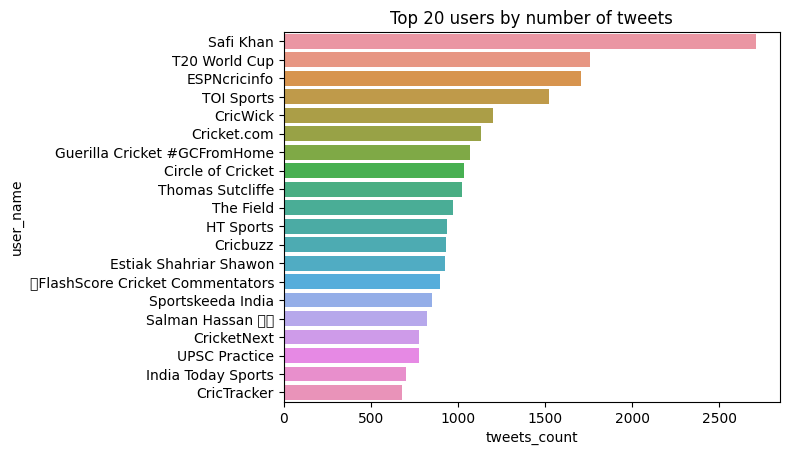

In [6]:
ds = df['user_name'].value_counts().reset_index()
ds.columns = ['user_name', 'tweets_count']
ds = ds.sort_values(['tweets_count'],ascending=False)
t20_world_cup = pd.merge(df, ds, on='user_name')

fig = sns.barplot(
    x=ds.head(20)["tweets_count"],
    y=ds.head(20)["user_name"],
    orientation='horizontal'
).set_title('Top 20 users by number of tweets')

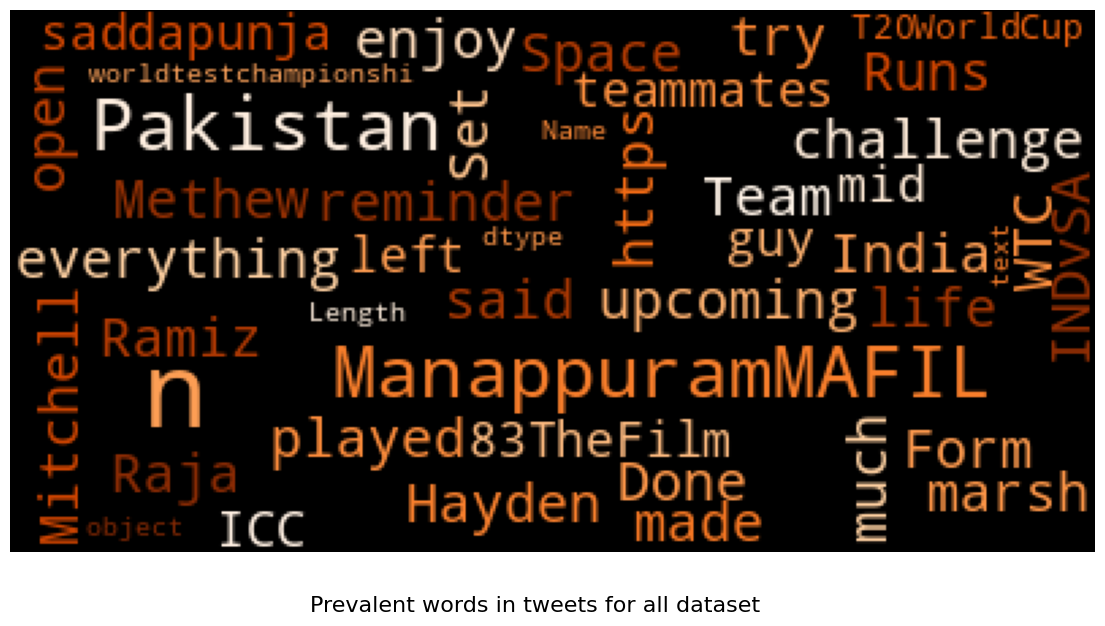

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def build_wordcloud(df, title):
    wordcloud = WordCloud(
        background_color='black',colormap="Oranges",
        stopwords=set(STOPWORDS),
        max_words=50,
        max_font_size=40,
        random_state=666
    ).generate(str(df))

    fig = plt.figure(1, figsize=(14,14))
    plt.axis('off')
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

build_wordcloud(df['text'], 'Prevalent words in tweets for all dataset')

In [8]:
# Install the required libraries
!pip install nltk
!pip install vaderSentiment

In [9]:
columns_to_drop = ['user_name', 'user_location', 'user_description', 'user_created', 'user_followers',
                   'user_friends', 'user_favourites', 'user_verified', 'date', 'hashtags', 'source', 'is_retweet']

df.drop(columns=columns_to_drop, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430383 entries, 0 to 430382
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    430383 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Set the threshold for binary classification
threshold = 0.1

# Function to get the binary polarity (1 or 0) for a given text
def get_binary_polarity(text):
    if isinstance(text, str):
        compound_score = analyzer.polarity_scores(text)['compound']
        return 1 if compound_score >= threshold else 0
    else:
        return 0  # or any other default value for non-string values

df['polarity'] = df['text'].apply(get_binary_polarity)

print(df.head(15))
df.info()
print(df['polarity'].unique())


                                                 text  polarity
0   @ManappuramMAFIL Done Team \n@ManappuramMAFIL ...         0
1   Set a reminder for my upcoming Space! https://...         1
2   "We just try to enjoy everything that we do."\...         1
3   #Pakistan and #India played each other in open...         1
4   #Pakistan won't be much of a challenge for #In...         1
5   This is exactly what India is going to do to P...         1
6   Am i the only one who waiting for Sunday!!!\n#...         0
7   @ESPNcricinfo @FirdoseM It would be even more ...         1
8   @SportzFirst @MontyPanesar Having MSD as a men...         1
9   The #SaitamaWolfPack and #saitama are on fire!...         0
10  #PakVsInd Inshallah, Fakhar Zaman will repeat ...         0
11  Come on @TheRealPCB. This Team has it all to w...         1
12  Predictions for tomorrow in the #T20WorldCup …...         0
13  @hvgoenka Good Luck All The Best Harsh Sir\n\n...         1
14  Who is winning today? Poll for Match

In [11]:
(df.isnull().sum() / len(data))*100

data['text'] = data['text'].astype('str')

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'am', 'when', 'herself', 'then', 'few', 'shan', 'the', "needn't", 're', 'only', "you're", 'an', 'should', 'not', 'me', 'about', 'is', 's', 'out', 'or', 'myself', 'where', 'couldn', 'was', 'd', 'himself', 'both', 'here', "that'll", "should've", 'his', 'weren', 'a', 'yourself', 'with', 'isn', 'him', 'my', 'of', 'once', 'such', 'doing', 'how', 'who', 'some', 'will', 've', 'very', 'your', 'they', 'wouldn', 'its', 'our', 'can', "hadn't", "shan't", 'he', 'don', 'm', 'through', 'now', "mightn't", 'you', 'no', 'shouldn', 'their', 'into', 'yourselves', 'needn', 'until', 'that', 'most', "weren't", 'mightn', 'she', 'from', 'same', 'while', "you'll", 'it', 'down', 'at', "didn't", 'we', 'doesn', 'to', "mustn't", 'after', 'won', 'nor', "aren't", 'mustn', "wasn't", 'have', 'during', 'than', 'because', 'are', 'ma', 'ain', "she's", "you'd", 'didn', 'had', 'before', 'against', 'own', 'did', "you've", 'so', "couldn't", 'y', 'those', 'whom', 'up', 'any', "isn't", 'been', 'i', 'll', 'hadn', 'each', 'all',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'

stopword = set(stopwords.words('english'))

def process_tweets(tweet):
    if isinstance(tweet, str):
        # Lowercasing
        tweet = tweet.lower()
        tweet = tweet[1:]
        # Removing URLs
        tweet = re.sub(urlPattern, '', tweet)
        # Removing @usernames
        tweet = re.sub(userPattern, '', tweet)
        # Remove punctuations
        tweet = tweet.translate(str.maketrans("", "", string.punctuation))
        # Tokenizing words
        tokens = word_tokenize(tweet)
        # Removing stop words
        final_tokens = [w for w in tokens if w not in stopword]
        # Reducing a word to its word stem
        wordLemm = WordNetLemmatizer()
        finalwords = [wordLemm.lemmatize(w) for w in final_tokens if len(w) > 1]

        return ' '.join(finalwords)
    else:
        return ''  # or any other default value for non-string values

df['processed_tweets'] = df['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

df.head(10)


Text Preprocessing complete.


,text,polarity,processed_tweets
0,@ManappuramMAFIL Done Team \n@ManappuramMAFIL ...,0,manappurammafil done team guessandwin t20world...
1,Set a reminder for my upcoming Space! https://...,1,et reminder upcoming space match super saturda...
2,"""We just try to enjoy everything that we do.""\...",1,try enjoy everything westindies two t20worldcu...
3,#Pakistan and #India played each other in open...,1,pakistan india played opening group match 2014...
4,#Pakistan won't be much of a challenge for #In...,1,pakistan wont much challenge india agarkar say...
5,This is exactly what India is going to do to P...,1,exactly india going pakistan 24th october😂😂 in...
6,Am i the only one who waiting for Sunday!!!\n#...,0,one waiting sunday indvpak t20worldcup
7,@ESPNcricinfo @FirdoseM It would be even more ...,1,espncricinfo would even dramatic thrilling nam...
8,@SportzFirst @MontyPanesar Having MSD as a men...,1,sportzfirst msd mentor indian cricket team pri...
9,The #SaitamaWolfPack and #saitama are on fire!...,0,saitamawolfpack saitama fire join pack dyor bi...


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['processed_tweets'].values
y = df['polarity'].values
print(X.shape)
print(y.shape)

vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')

print(X.shape)
print(y.shape)

(430383,)
(430383,)
Vector fitted.
(430383, 121339)
(430383,)


In [16]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.processed_tweets)
sequences = tokenizer.texts_to_sequences(df.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ... 4734 3909 3999]
 [   0    0    0 ...  149   48  100]
 [   0    0    0 ...  855 1811  323]
 ...
 [   0    0    0 ... 4096 4022    1]
 [   0    0    0 ...  567    1 2326]
 [   0    0    0 ...   11  187  951]]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(tweets, df.polarity.values, test_size = 0.2, random_state=42)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (344306, 100)
y_train (344306,)

X_test (86077, 100)
y_test (86077,)


In [20]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model = Sequential()
model.add(layers.Embedding(max_words, 128))
model.add(layers.LSTM(64,dropout=0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history=model.fit(X_train,y_train,epochs=14,batch_size= 64,validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         640000    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 690593 (2.63 MB)
Trainable params: 690593 (2.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/14
5380/53

In [21]:
res = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(res[0],res[1]))

2690/2690 [==============================] - 12s 5ms/step - loss: 0.2774 - accuracy: 0.8961
Test set
  Loss: 0.277
  Accuracy: 0.896


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.25).astype(int)

# Handle one-dimensional arrays
if len(y_test.shape) > 1:
    y_test_int = np.argmax(y_test, axis=1)
else:
    y_test_int = y_test

conf_matrix = confusion_matrix(y_test_int, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test_int, y_pred)
print("\nAccuracy:", accuracy)

class_report = classification_report(y_test_int, y_pred)
print("\nClassification Report:")
print(class_report)


2690/2690 [==============================] - 12s 4ms/step

Confusion Matrix:
[[30203  7413]
 [ 3757 44704]]

Accuracy: 0.870232466280191

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84     37616
           1       0.86      0.92      0.89     48461

    accuracy                           0.87     86077
   macro avg       0.87      0.86      0.87     86077
weighted avg       0.87      0.87      0.87     86077



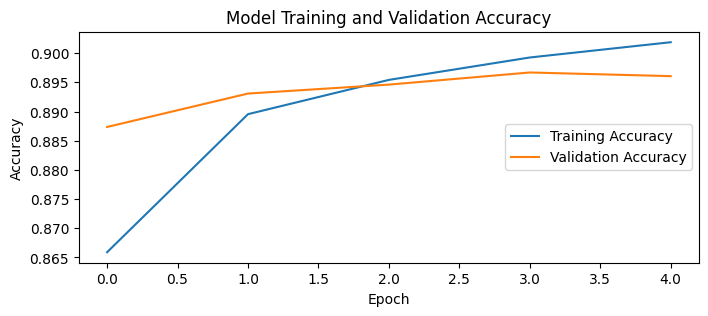

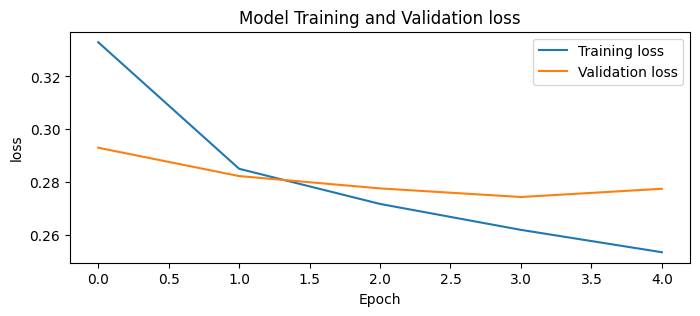

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(8,3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='right')
plt.show()

fig = plt.figure(figsize=(8,3))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

In [25]:
from keras.models import load_model
import numpy as np

custom_tweet = "espncricinfo would even dramatic thrilling namibia make final t20worldcup" #1

# Preprocess the custom tweet using the same tokenizer
custom_sequence = tokenizer.texts_to_sequences([custom_tweet])
custom_padded_sequence = pad_sequences(custom_sequence, maxlen=max_len)

prediction = model.predict(np.array(custom_padded_sequence))

# Model predicts binary sentiment (0 for negative, 1 for positive)
sentiment = "Positive" if prediction[0][0] > 0.25 else "Negative"

print(f"Custom Tweet: {custom_tweet}")
print(f"Predicted Sentiment: {sentiment} (Probability: {prediction[0][0]})")


1/1 [==============================] - 0s 22ms/step
Custom Tweet: espncricinfo would even dramatic thrilling namibia make final t20worldcup
Predicted Sentiment: Positive (Probability: 0.9623661637306213)


In [26]:
from keras.models import load_model
import numpy as np

custom_tweet = "saitamawolfpack saitama fire join pack dyor bitcoin bnb bscgems cryptocurrencies coinmarketcap defi evergrande ethereum floki t20worldcup rockwithyou" #0

# Preprocess the custom tweet using the same tokenizer
custom_sequence = tokenizer.texts_to_sequences([custom_tweet])
custom_padded_sequence = pad_sequences(custom_sequence, maxlen=max_len)

prediction = model.predict(np.array(custom_padded_sequence))

# Model predicts binary sentiment (0 for negative, 1 for positive)
sentiment = "Positive" if prediction[0][0] > 0.25 else "Negative"

print(f"Custom Tweet: {custom_tweet}")
print(f"Predicted Sentiment: {sentiment} (Probability: {prediction[0][0]})")


1/1 [==============================] - 0s 29ms/step
Custom Tweet: saitamawolfpack saitama fire join pack dyor bitcoin bnb bscgems cryptocurrencies coinmarketcap defi evergrande ethereum floki t20worldcup rockwithyou
Predicted Sentiment: Negative (Probability: 0.20923270285129547)
